In [1]:
import pandas as pd

In [2]:
df_data=[[1900,'1-4 Years', 1983.8],[1901, '1-4 Years', 1695.0]]
df_columns = ['Year', 'Age Group', 'Death Rate']

In [3]:
mortalityDF = pd.DataFrame(data=df_data, columns=df_columns)
mortalityDF

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0


In [4]:
mortalityDF.to_pickle('mortData.pk1')

In [5]:
tempDF = pd.read_pickle('mortData.pk1')
tempDF

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0


In [6]:
url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
mortality_data = pd.read_csv(url)
mortality_data
print(mortality_data.head())

   Year  Age Group  Death Rate
0  1900  1-4 Years      1983.8
1  1901  1-4 Years      1695.0
2  1902  1-4 Years      1655.7
3  1903  1-4 Years      1542.1
4  1904  1-4 Years      1591.5


In [7]:
df = pd.read_excel('mortality_wide.xlsx')
# df = pd.read_excel('Data_Analytics/mortality_wide.xlsx')
df

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714
...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455
115,2015,0.000249,0.000117,0.000146,0.000483
116,2016,0.000253,0.000122,0.000146,0.000512
117,2017,0.000243,0.000116,0.000155,0.000515


In [8]:
mortality_data.values

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [9]:
print("Index: ", mortality_data.index)
print("Columns: ", mortality_data.columns)
print("Size: ", mortality_data.size)
print("Shape: ", mortality_data.shape)

Index:  RangeIndex(start=0, stop=476, step=1)
Columns:  Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:  1428
Shape:  (476, 3)


In [10]:
mortality_data.columns = mortality_data.columns.str.replace(" ", "")
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [11]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [12]:
mortality_data.nunique()

Year         119
AgeGroup       4
DeathRate    430
dtype: int64

In [13]:
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [14]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


In [15]:
mortality_data.DeathRate

0      1983.8
1      1695.0
2      1655.7
3      1542.1
4      1591.5
        ...  
471      45.5
472      48.3
473      51.2
474      51.5
475      49.2
Name: DeathRate, Length: 476, dtype: float64

In [16]:
mortality_data['AgeGroup']

0        1-4 Years
1        1-4 Years
2        1-4 Years
3        1-4 Years
4        1-4 Years
          ...     
471    15-19 Years
472    15-19 Years
473    15-19 Years
474    15-19 Years
475    15-19 Years
Name: AgeGroup, Length: 476, dtype: object

In [17]:
mortality_data[['Year','DeathRate']]

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
471,2014,45.5
472,2015,48.3
473,2016,51.2
474,2017,51.5


In [18]:
mortality_data.query('Year==1900')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [19]:
mortality_data.query('Year==2000 and AgeGroup != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [20]:
mortality_data.query('Year==1900 or Year == 2000')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3
338,2000,10-14 Years,20.3
357,1900,15-19 Years,484.8
457,2000,15-19 Years,67.1


In [21]:
mortality_data.query('Year==1900').DeathRate

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [22]:
mortality_data.query('Year==1900')['DeathRate']

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [23]:
mortality_data.query('Year==1900')[['DeathRate']]

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [24]:
mortality_data.query('Year==1900')[['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


In [25]:
mortality_data.loc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [26]:
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [27]:
mortality_data.loc[0:100:10]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
10,1910,1-4 Years,1397.3
20,1920,1-4 Years,987.2
30,1930,1-4 Years,563.6
40,1940,1-4 Years,289.6
50,1950,1-4 Years,139.4
60,1960,1-4 Years,109.1
70,1970,1-4 Years,84.5
80,1980,1-4 Years,63.9
90,1990,1-4 Years,46.8


In [28]:
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [29]:
mortality_data.loc[5:12,'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
5,1-4 Years,1498.9
6,1-4 Years,1580.0
7,1-4 Years,1468.3
8,1-4 Years,1396.8
9,1-4 Years,1348.9
10,1-4 Years,1397.3
11,1-4 Years,1176.0
12,1-4 Years,1094.1


In [30]:
mortality_data.iloc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [31]:
mortality_data.iloc[[4,5,6],[1,2]]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [32]:
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [33]:
mortality_data.iloc[-10:]

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [34]:
mortality_data.sort_values('DeathRate', ascending=False)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
4,1904,1-4 Years,1591.5
6,1906,1-4 Years,1580.0
...,...,...,...
236,2017,5-9 Years,11.6
237,2018,5-9 Years,11.5
233,2014,5-9 Years,11.5
229,2010,5-9 Years,11.5


In [35]:
# sort by year the death rate
mortality_data.sort_values(['Year','DeathRate'])

,Year,AgeGroup,DeathRate
238,1900,10-14 Years,298.3
119,1900,5-9 Years,466.1
357,1900,15-19 Years,484.8
0,1900,1-4 Years,1983.8
239,1901,10-14 Years,273.6
...,...,...,...
474,2017,15-19 Years,51.5
237,2018,5-9 Years,11.5
356,2018,10-14 Years,14.9
118,2018,1-4 Years,24.0


In [36]:
# sort by ascending year then descending death rate
mortality_data.sort_values(['Year','DeathRate'], ascending=[True,False])

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
357,1900,15-19 Years,484.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
1,1901,1-4 Years,1695.0
...,...,...,...
236,2017,5-9 Years,11.6
475,2018,15-19 Years,49.2
118,2018,1-4 Years,24.0
356,2018,10-14 Years,14.9


In [37]:
mortality_data.DeathRate.mean()

192.92415966386554

In [38]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [39]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
dtype: int64

In [40]:
mortality_data.quantile([.1,.9])

,Year,DeathRate
0.1,1911.5,21.50
0.9,2006.5,430.85


In [41]:
mortality_data['MeanCentered'] = mortality_data.DeathRate - mortality_data.DeathRate.mean()
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584
4,1904,1-4 Years,1591.5,1398.57584
...,...,...,...,...
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416


In [42]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1790.87584
1,1901,1-4 Years,0.016950,1502.07584
2,1902,1-4 Years,0.016557,1462.77584
3,1903,1-4 Years,0.015421,1349.17584
4,1904,1-4 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


In [43]:
# use pandas replace method:
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'], inplace = True
)
# use pythong replace method:
    # mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('1-4 Years','01-04 Years')
    # mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('5-9 Years','05-09 Years')
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


In [44]:
# set a one column index
mortality_data = mortality_data.set_index('Year')
mortality_data


,AgeGroup,DeathRate,MeanCentered
Year,,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584
1902,01-04 Years,0.016557,1462.77584
1903,01-04 Years,0.015421,1349.17584
1904,01-04 Years,0.015915,1398.57584
...,...,...,...
2014,15-19 Years,0.000455,-147.42416
2015,15-19 Years,0.000483,-144.62416
2016,15-19 Years,0.000512,-141.72416


In [45]:
mortality_data.reset_index(inplace=True)

In [46]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys

# mortality_data = mortality_data.set_index('Year', verify_integrity=True)

In [47]:
# combine columns to create all unique keys for index
# mortality_data.reset_index(inplace=True) #-already resetindex; resetting twice adds another index column
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(10)

,,DeathRate,MeanCentered
Year,AgeGroup,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584
1902,01-04 Years,0.016557,1462.77584
1903,01-04 Years,0.015421,1349.17584
1904,01-04 Years,0.015915,1398.57584
1905,01-04 Years,0.014989,1305.97584
1906,01-04 Years,0.015800,1387.07584
1907,01-04 Years,0.014683,1275.37584
1908,01-04 Years,0.013968,1203.87584


In [48]:
# make wide data with Year as index, column headers by Age Group and cell values of Death Rate
mortality_data.reset_index(inplace=True) #on next line setting index; reset to default index here
mortality_wide = mortality_data.pivot(index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215
1903,0.015421,0.004147,0.002682,0.004341
1904,0.015915,0.004250,0.003052,0.004714
...,...,...,...,...
2014,0.000240,0.000115,0.000140,0.000455
2015,0.000249,0.000117,0.000146,0.000483
2016,0.000253,0.000122,0.000146,0.000512


In [49]:
# not specifying values param; all other columns will be included
mortality_wide = mortality_data.pivot(index='Year', columns='AgeGroup')
mortality_wide.head(30)

DeathRate                                     MeanCentered  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years  01-04 Years   
Year                                                                    
1900        0.019838    0.004661    0.002983    0.004848   1790.87584   
1901        0.016950    0.004276    0.002736    0.004544   1502.07584   
1902        0.016557    0.004033    0.002525    0.004215   1462.77584   
1903        0.015421    0.004147    0.002682    0.004341   1349.17584   
1904        0.015915    0.004250    0.003052    0.004714   1398.57584   
1905        0.014989    0.003963    0.002798    0.004393   1305.97584   
1906        0.015800    0.003774    0.002722    0.004452   1387.07584   
1907        0.014683    0.003656    0.002658    0.004377   1275.37584   
1908        0.013968    0.003542    0.002479    0.003977   1203.87584   
1909        0.013489    0.003302    0.002305    0.003636   1155.97584   
1910        0.013973    0.003484    0.002359    0.003719   1204.37584   
1911        0.011760    0.003100    0.002222    0.003660    983.07584   
1912        0.010941    0.002875    0.002022    0.003472    901.17584   
1913        0.011934    0.003177    0.002148    0.003603   1000.47584   
1914        0.010242    0.002916    0.002072    0.003405    831.27584   
1915        0.009242    0.002606    0.001967    0.003309    731.27584   
1916        0.011115    0.002824    0.002051    0.003558    918.57584   
1917        0.010660    0.002907    0.002189    0.003803    873.07584   
1918        0.015735    0.004479    0.003751    0.007774   1380.57584   
1919        0.009280    0.003000    0.002364    0.004385    735.07584   
1920        0.009872    0.002952    0.002299    0.004029    794.27584   
1921        0.008012    0.002814    0.002099    0.003265    608.27584   
1922        0.007420    0.002396    0.001866    0.003196    549.07584   
1923        0.008067    0.002400    0.001882    0.003258    613.77584   
1924        0.006832    0.002217    0.001798    0.003135    490.27584   
1925        0.006410    0.002115    0.001810    0.003140    448.07584   
1926        0.007234    0.002138    0.001714    0.003075    530.47584   
1927        0.005910    0.002083    0.001675    0.002895    398.07584   
1928        0.006475    0.002131    0.001738    0.003078    454.57584   
1929        0.006255    0.002080    0.001650    0.002980    432.57584   

                                              
AgeGroup 05-09 Years 10-14 Years 15-19 Years  
Year                                          
1900       273.17584   105.37584   291.87584  
1901       234.67584    80.67584   261.47584  
1902       210.37584    59.57584   228.57584  
1903       221.77584    75.27584   241.17584  
1904       232.07584   112.27584   278.47584  
1905       203.37584    86.87584   246.37584  
1906       184.47584    79.27584   252.27584  
1907       172.67584    72.87584   244.77584  
1908       161.27584    54.97584   204.77584  
1909       137.27584    37.57584   170.67584  
1910       155.47584    42.97584   178.97584  
1911       117.07584    29.27584   173.07584  
1912        94.57584     9.27584   154.27584  
1913       124.77584    21.87584   167.37584  
1914        98.67584    14.27584   147.57584  
1915        67.67584     3.77584   137.97584  
1916        89.47584    12.17584   162.87584  
1917        97.77584    25.97584   187.37584  
1918       254.97584   182.17584   584.47584  
1919       107.07584    43.47584   245.57584  
1920       102.27584    36.97584   209.97584  
1921        88.47584    16.97584   133.57584  
1922        46.67584    -6.32416   126.67584  
1923        47.07584    -4.72416   132.87584  
1924        28.77584   -13.12416   120.57584  
1925        18.57584   -11.92416   121.07584  
1926        20.87584   -21.52416   114.57584  
1927        15.37584   -25.42416    96.57584  
1928        20.17584   -19.12416   114.87584  
1929        15.07584   -27.92416   105.07584

## Melt Data

In [50]:
# get starting data
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')

# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341


In [51]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year', #Years column to ID ea row in result
    value_vars=['01-04 Years','05-09 Years'], # just melt these 2 columns
    var_name ='AgeGroup', #new column name for the melted columns
    value_name='DeathRate') #new column DeathRate to store values for each row

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


## Analyze data

### Group data

In [52]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,MeanCentered
AgeGroup,,,
01-04 Years,1959.0,0.003832,190.301891
05-09 Years,1959.0,0.001173,-75.598109
10-14 Years,1959.0,0.000938,-99.154412
15-19 Years,1959.0,0.001774,-15.549370


In [53]:
mortality_data.groupby(['Year','AgeGroup']).count().tail()

DeathRate  MeanCentered
Year AgeGroup                            
2017 15-19 Years          1             1
2018 01-04 Years          1             1
     05-09 Years          1             1
     10-14 Years          1             1
     15-19 Years          1             1

## Aggregate Data

In [54]:
mortality_data.groupby('AgeGroup').agg(['mean','median'])

Year         DeathRate           MeanCentered           
               mean  median      mean    median         mean     median
AgeGroup                                                               
01-04 Years  1959.0  1959.0  0.003832  0.001091   190.301891  -83.82416
05-09 Years  1959.0  1959.0  0.001173  0.000484   -75.598109 -144.52416
10-14 Years  1959.0  1959.0  0.000938  0.000446   -99.154412 -148.32416
15-19 Years  1959.0  1959.0  0.001774  0.001069   -15.549370  -86.02416

In [55]:
mortality_data.groupby('AgeGroup')['DeathRate'].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,0.003832,0.001091,0.005005,117
05-09 Years,0.001173,0.000484,0.001275,115
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117


In [56]:
mortality_data.groupby('Year')['DeathRate'].agg(['mean','median','std','min','max','var','nunique'])

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,6.212178e-05,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,4.352410e-05,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,4.260299e-05,4
1903,0.006648,0.004244,0.005896,0.002682,0.015421,3.475731e-05,4
1904,0.006983,0.004482,0.005996,0.003052,0.015915,3.595034e-05,4
...,...,...,...,...,...,...,...
2014,0.000237,0.000190,0.000155,0.000115,0.000455,2.394167e-08,4
2015,0.000249,0.000197,0.000166,0.000117,0.000483,2.759625e-08,4
2016,0.000258,0.000200,0.000178,0.000122,0.000512,3.186025e-08,4


# Visualize

<AxesSubplot:xlabel='Year'>

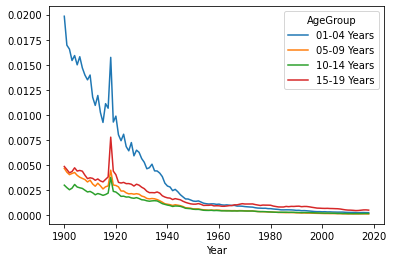

In [57]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

<AxesSubplot:ylabel='AgeGroup'>

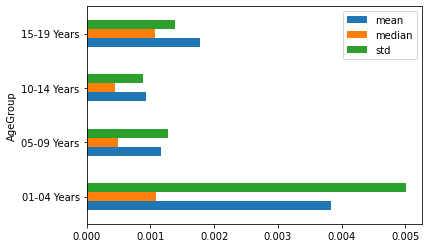

In [58]:
mortality_data.groupby('AgeGroup')['DeathRate'].agg(['mean','median','std']).plot.barh()